In [1]:
import pandas as pd
import numpy as np
import torch
from torch import nn, optim
from torch.nn import functional as F
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torchvision

In [2]:
data_train = pd.read_csv('C:/Users/jefferson.maria/Desktop/Kaggle-Previsao/Digito_NUmero/train.csv')
data_test = pd.read_csv('C:/Users/jefferson.maria/Desktop/Kaggle-Previsao/Digito_NUmero/test.csv')
sample_submission = pd.read_csv('C:/Users/jefferson.maria/Desktop/Kaggle-Previsao/Digito_NUmero/sample_submission.csv' )

In [3]:
data_train.shape

(42000, 785)

In [4]:
data_test.shape

(28000, 784)

In [5]:
data_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train = data_train.iloc[:, 1: 785 ].values
target = data_train.iloc[:, 0].values

In [8]:
train[3]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 220, 179,   6,   0,   0,   0,   0,   0,   0,   0,
         0,   9,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  28, 247,  17,   0,   0,   0,   

In [9]:
normalizador = MinMaxScaler()
train = normalizador.fit_transform( train, (0,1))

In [10]:
x_train, x_test, y_train, y_test =  train_test_split( train, target, test_size= 0.20, random_state= 0)

In [11]:
x_train[3]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

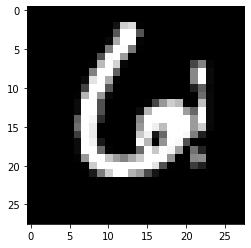

In [47]:
imagem = next(iter(X_train)).view(28, 28) # (1, 1, 28, 28)
plt.imshow(imagem, cmap='gray')

In [13]:
X_train = torch.tensor( x_train ).reshape( -1, 1, 28, 28)
X_teste = torch.tensor( x_test).reshape( -1, 1,28, 28)

In [14]:
print(X_train.shape)
print(X_teste.shape)

torch.Size([33600, 1, 28, 28])
torch.Size([8400, 1, 28, 28])


In [15]:
Y_train = torch.tensor( y_train )
Y_test = torch.tensor( y_test )

In [16]:
print(Y_train.shape)
print(Y_test.shape)

torch.Size([33600])
torch.Size([8400])


In [17]:
X_teste.shape

torch.Size([8400, 1, 28, 28])

In [18]:
X_train.shape

torch.Size([33600, 1, 28, 28])

In [19]:
dataset_train = torch.utils.data.TensorDataset( X_train, Y_train)
dataset_test = torch.utils.data.TensorDataset( X_teste, Y_test )

In [20]:
train_loader = torch.utils.data.DataLoader( dataset_train, batch_size= 32, shuffle= True)
test_loader = torch.utils.data.DataLoader( dataset_test, batch_size= 32, shuffle= True)

Tratando os dados de Teste

In [22]:
teste = normalizador.fit_transform( data_test, (0,1))

In [23]:
teste.shape

(28000, 784)

In [24]:
teste = torch.tensor( teste , dtype= torch.float ).reshape(-1,1,28,28)

In [25]:
teste.shape

torch.Size([28000, 1, 28, 28])

In [26]:
class Modelo(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Passando por parametro 1 dimensoes, 2 saida de fuiltros e 3- matrix de verificacao
        self.conv_input = nn.Conv2d( in_channels= 1, out_channels= 32, kernel_size= ( 3, 3 ))
        self.conv_hidden = nn.Conv2d( in_channels= 32, out_channels=32, kernel_size= ( 3, 3 ))
        self.function_activation = nn.ReLU()
        # Passando a quantidade de entrrada de caracteristicas para normalizar os dados dos pixes que estao entre 0 e 255
        # self.bnorm = nn.BatchNorm2d( num_features= 32)
        # max pooling é a matrix dois por dois pegando os maiores da dodaso entre as matrixes
        self.pool = nn.MaxPool2d(kernel_size=( 2, 2))
        # Flatten converte a matrix final em vetor de entrada
        self.flaten = nn.Flatten()

        # output = (input - filter + 1) / stride
        # convolução 1: (28 - 3 + 1) / 1 = 26x26
        # pooling 1: 13x13
        # convolução 2: (13 - 3 + 1) / 1 = 11x11
        # pooling 2: 5x5
        # 5 * 5 * 32
        # 800 -> 128 -> 128 -> 10
        self.layer_input = nn.Linear( in_features= 32*5*5, out_features= 128 )
        self.layer_hidden = nn.Linear( 128, 128 )
        self.layer_output = nn.Linear( 128, 10 )
        self.dropout = nn.Dropout( 0.2 )

    def forward( self,  X ):
        X = self.pool( self.function_activation( self.conv_input( X )))
        X = self.pool( self.function_activation( self.conv_hidden( X )))
        X = self.flaten( X )

        X = self.dropout( self.function_activation( self.layer_input( X )))
        X = self.dropout( self.function_activation( self.layer_hidden( X )))
        X = self.layer_output( X )

        return X

In [27]:
model = Modelo()
# model.load_state_dict(torch.load('C:\\Users\\jefferson.maria\\Desktop\\Kaggle-Previsao\\Digito_NUmero\\salve.pth' )) 
critetion = nn.CrossEntropyLoss()
optmizer = optim.Adam( model.parameters())

In [28]:
model

Modelo(
  (conv_input): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv_hidden): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (function_activation): ReLU()
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (flaten): Flatten()
  (layer_input): Linear(in_features=800, out_features=128, bias=True)
  (layer_hidden): Linear(in_features=128, out_features=128, bias=True)
  (layer_output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [29]:
optmizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)

In [30]:
def Train_loop( loader, epocha):
    running_loss = 0.
    running_accuracy = 0.
    
    for i, data in enumerate( loader ):

        inputs, labels = data
        optmizer.zero_grad()
        
        outputs = model( inputs.float() )
        loss = critetion( outputs,  labels)
        loss.backward()

        optmizer.step()

        running_loss += loss.item()

        ps = F.softmax( outputs )
        top_p, top_class = ps.topk( k=1, dim= 1)
        equals = top_class == labels.view( *top_class.shape )

        accuracy = torch.mean( equals.type( torch.float ))

        running_accuracy += accuracy

         # Imprimindo os dados referentes a este loop
        print('\rEphoc {:3d} - Loop {:3d} in {:3d}: loss {:03.2f} - accuracy {:03.2f}'.format(epocha + 1, i + 1, len(loader), loss, accuracy), end = '\r')
        
    # Imprimindo os dados referentes a esta época
    print('\rEphoc {:3d} Finish: loss {:.5f} - accuracy {:.5f}'.format(epocha+1, running_loss/len(loader), 
                     running_accuracy/len( loader )))


In [31]:
for epocha in range( 5 ):
    print('Training....')
    Train_loop( train_loader, epocha )
    print('Testando....')
    model.eval()
    Train_loop( test_loader, epocha )
    model.train()

Training....
Ephoc   1 Finish: loss 0.32266 - accuracy 0.89509
Testando....
Ephoc   1 Finish: loss 0.08725 - accuracy 0.97148
Training....
Ephoc   2 Finish: loss 0.09424 - accuracy 0.97083
Testando....
Ephoc   2 Finish: loss 0.05519 - accuracy 0.98301
Training....
Ephoc   3 Finish: loss 0.06450 - accuracy 0.98054
Testando....
Ephoc   3 Finish: loss 0.03866 - accuracy 0.98836
Training....
Ephoc   4 Finish: loss 0.05539 - accuracy 0.98292
Testando....
Ephoc   4 Finish: loss 0.03067 - accuracy 0.99038
Training....
Ephoc   5 Finish: loss 0.04477 - accuracy 0.98667
Testando....
Ephoc   5 Finish: loss 0.02325 - accuracy 0.99228


In [32]:
torch.save( model.state_dict(), 'salve.pth')

In [33]:
modelo = model.eval()
previsao = modelo.forward( teste )

In [34]:
previsao

tensor([[-10.2754,  -4.1984,  17.9428,  ...,  -4.2097,  -5.0589, -11.2161],
        [  9.2330,  -8.5751,  -1.9859,  ...,  -7.0566,  -4.9190,  -2.6258],
        [ -9.7240, -11.8829,  -7.2115,  ...,  -3.8453,  -2.5916,   9.8847],
        ...,
        [-23.0682,  -7.5625, -11.4193,  ...,  -8.1221, -11.4276,  -2.5925],
        [ -7.3826, -13.4149,  -8.1520,  ...,  -4.1343,  -2.8982,   9.9889],
        [-13.2431,  -4.8102,  18.8280,  ...,  -5.2866,  -1.2228, -11.0550]],
       grad_fn=<AddmmBackward>)

In [35]:
previsao = F.softmax( previsao )

In [36]:
previsao

tensor([[5.5588e-13, 2.4220e-10, 1.0000e+00,  ..., 2.3950e-10, 1.0244e-10,
         2.1698e-13],
        [9.9990e-01, 1.8449e-08, 1.3417e-05,  ..., 8.4227e-08, 7.1422e-07,
         7.0753e-06],
        [3.0480e-09, 3.5189e-10, 3.7600e-08,  ..., 1.0893e-06, 3.8157e-06,
         9.9999e-01],
        ...,
        [2.5275e-19, 1.3699e-12, 2.8956e-14,  ..., 7.8289e-13, 2.8716e-14,
         1.9732e-10],
        [2.8553e-08, 6.8524e-11, 1.3228e-08,  ..., 7.3507e-07, 2.5303e-06,
         9.9998e-01],
        [1.1795e-14, 5.4207e-11, 1.0000e+00,  ..., 3.3665e-11, 1.9591e-09,
         1.0519e-13]], grad_fn=<SoftmaxBackward>)

In [37]:
previsao = previsao.cpu().detach().numpy()

In [38]:
previsao

array([[5.55881296e-13, 2.42201148e-10, 1.00000000e+00, ...,
        2.39496339e-10, 1.02438689e-10, 2.16980283e-13],
       [9.99901772e-01, 1.84491853e-08, 1.34170459e-05, ...,
        8.42266914e-08, 7.14220675e-07, 7.07529807e-06],
       [3.04802450e-09, 3.51888824e-10, 3.75999250e-08, ...,
        1.08925803e-06, 3.81567997e-06, 9.99986768e-01],
       ...,
       [2.52753386e-19, 1.36992761e-12, 2.89564007e-14, ...,
        7.82885746e-13, 2.87163786e-14, 1.97319078e-10],
       [2.85526163e-08, 6.85239782e-11, 1.32277949e-08, ...,
        7.35069591e-07, 2.53027065e-06, 9.99984622e-01],
       [1.17952531e-14, 5.42066288e-11, 1.00000000e+00, ...,
        3.36650430e-11, 1.95908756e-09, 1.05188915e-13]], dtype=float32)

In [39]:
resultados = [] 
for i in range(len( previsao )):

    resultados.append(np.argmax( previsao[i] )) 

In [40]:
resultados[0:56]

[2,
 0,
 9,
 9,
 3,
 7,
 0,
 3,
 0,
 3,
 5,
 7,
 4,
 0,
 4,
 3,
 3,
 1,
 9,
 0,
 9,
 1,
 1,
 5,
 7,
 4,
 2,
 7,
 4,
 7,
 7,
 5,
 4,
 2,
 6,
 2,
 5,
 5,
 1,
 6,
 7,
 7,
 4,
 9,
 8,
 7,
 8,
 2,
 6,
 7,
 6,
 8,
 8,
 3,
 8,
 2]

In [41]:
res = np.array( resultados )

In [42]:
results =pd.DataFrame()
results['ImageId'] = sample_submission['ImageId']
results['Label'] = res.astype(int)

In [43]:
results.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [44]:
results.to_csv('submission_finish2.csv',index=False)

In [45]:
submission = pd.read_csv('C:/Users/jefferson.maria/Desktop/Kaggle-Previsao/Digito_NUmero/submission_finish2.csv' )

In [46]:
submission['Label'].fii

AttributeError: 'Series' object has no attribute 'fii'